## Maximum Likelihood Estimates (MLEs)

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import scipy
import scipy.stats

### Normal Distribution

In [2]:
TRUE_MEAN = 40
TRUE_STD = 10
X = np.random.normal(TRUE_MEAN, TRUE_STD, 1000)

We can define functions that, given our data, will compute the MLEs for the $\mu$ and $\sigma$ parameters of the normal distribution.

In [3]:
def normal_mu_MLE(X):
    # get the number of observations
    T = len(X)
    # sum the observations
    s = sum(X)
    return 1.0/T * s

def normal_sigma_MLE(X):
    T = len(X)
    # get the mu MLE
    mu = normal_mu_MLE(X)
    # sum the square of the differences
    s = sum(np.power((X - mu), 2) )
    # compute sigma^2
    sigma_squared = 1.0/T * s
    return math.sqrt(sigma_squared)

In [4]:
print("Mean Estimation")
print(normal_mu_MLE(X))
print(np.mean(X))
print("Standard Deviation Estimation")
print(normal_sigma_MLE(X))
print(np.std(X))

Mean Estimation
40.9544458495279
40.95444584952788
Standard Deviation Estimation
10.059110034340483
10.05911003434048


We can also estimate both parameters using `scipy` built in `fit()` function.

In [5]:
mu, std = scipy.stats.norm.fit(X)
print("mu estimate: ", str(mu))
print("std estimate: ", str(std))

mu estimate:  40.95444584952788
std estimate:  10.05911003434048


We can plot the distribution PDF along with the data to see how well it fits. This can be done by accessing the pdf provided in `scipy.stats.norm.pdf`.

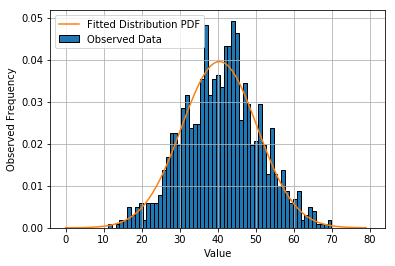

In [8]:
pdf = scipy.stats.norm.pdf

x = np.linspace(0, 80, 80)
plt.hist(X, bins=x, normed='true', edgecolor='black')
plt.plot(pdf(x, loc=mu, scale=std))
plt.xlabel('Value')
plt.ylabel('Observed Frequency')
plt.legend(['Fitted Distribution PDF', 'Observed Data', ])
plt.grid(True);

### Exponential Distribution

Let's do the same thing, but for the exponential distribution.

In [9]:
TRUE_LAMBDA = 5
X = np.random.exponential(TRUE_LAMBDA, 1000)

`numpy` defines the exponential distribution as

$\frac{1}{\lambda} e^{-\frac{x}{\lambda}}$

So we need to invert the MLE from the lecture notes:

$\hat \lambda = \frac{T}{\sum_{t=1}^T x_t}$

Here it's just the reciprocal so:

$\hat \lambda = \frac{\sum_{t=1}^T x_t}{T}$

In [10]:
def exp_lambda_MLE(X):
    T = len(X)
    s = sum(X)
    return s/T

In [13]:
print("lambda estimate: " + str(exp_lambda_MLE(X)))

lambda estimate: 5.019946418440433


In [15]:
_, l = scipy.stats.expon.fit(X, floc=0)

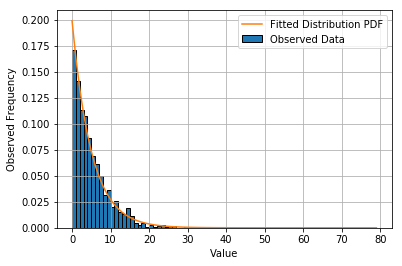

In [16]:
pdf = scipy.stats.expon.pdf
x = range(0, 80)
plt.hist(X, bins=x, normed='true', edgecolor='black')
plt.grid(True)
plt.plot(pdf(x, scale=l))
plt.xlabel('Value')
plt.ylabel('Observed Frequency')
plt.legend(['Fitted Distribution PDF', 'Observed Data', ]);